In [1]:
import pandas as pd
import os
import numpy as np

from settings import TIME_RESULTS_PATH, TIME_LIMIT, DATASET_TABLE_PATH

In [2]:
# import pandas as pd

# dataset_table = pd.DataFrame([
#     ["bbcsport", 116, [1991, 2063, 2113, 2158]],
#     ["bdgp", 2500, [1750, 79]],
#     ["buaa", 90, [100, 100]],
#     ["caltech101", 9144, [48, 40, 254, 1984, 512, 928]],
#     ["digits", 2000, [6, 64, 216, 47, 76, 240]],
#     ["metabric", 1904, [2000, 2000]],
#     ["nuswide", 30000, [64, 225, 144, 73, 128]],
#     ["nutrimouse", 40, [120, 21]],
#     ["sensIT300", 300, [50, 50]],
#     ["simulated_gm", 100, [2, 2]],
#     ["simulated_InterSIM", 500, [367, 131, 160]],
#     ["simulated_netMUG", 1000, [2000, 2000]],
#     ["statlog", 2310, [9, 10]],
#     ["tcga", 2437, [215, 2000, 131, 1739]],
#     ["webkb", 1051, [3000, 1840]],
#     ["wisconsin", 265, [265, 1703]],
# ], columns=["dataset", "n_samples", "n_features"])

# dataset_table["n_cells"] = dataset_table.apply(lambda x: sum([x["n_samples"]*view for view in x["n_features"]]), axis= 1)
# dataset_table = dataset_table.sort_values("n_cells")
# dataset_table.to_csv("results/dataset_table.csv", index= False)

In [3]:
dataset_table = pd.read_csv(DATASET_TABLE_PATH)
dataset_table = dataset_table.reindex(dataset_table.index.append(dataset_table.index[dataset_table["dataset"]=="nutrimouse"])).sort_index().reset_index(drop=True)
dataset_table.loc[dataset_table["dataset"] == "nutrimouse", "dataset"] = ["nutrimouse_genotype", "nutrimouse_diet"]
dataset_table = dataset_table.set_index("dataset")
print("dataset_table", dataset_table.shape)
dataset_table

dataset_table (17, 3)


,n_samples,n_features,n_cells
dataset,,,
simulated_gm,100,"[2, 2]",400
nutrimouse_genotype,40,"[120, 21]",5640
nutrimouse_diet,40,"[120, 21]",5640
buaa,90,"[100, 100]",18000
sensIT300,300,"[50, 50]",30000
statlog,2310,"[9, 10]",43890
simulated_InterSIM,500,"[367, 131, 160]",329000
wisconsin,265,"[265, 1703]",521520
bbcsport,116,"[1991, 2063, 2113, 2158]",965700


In [4]:
results = pd.read_csv(TIME_RESULTS_PATH, index_col=0)
results = results[dataset_table.sort_values("n_cells")["n_cells"].index]
print("results", results.shape)
results.head()

results (23, 17)


,simulated_gm,nutrimouse_genotype,nutrimouse_diet,buaa,sensIT300,statlog,simulated_InterSIM,wisconsin,bbcsport,digits,simulated_netMUG,bdgp,webkb,metabric,tcga,nuswide,caltech101
Concat,0.128960,0.017040,0.011321,0.391231,0.635927,1.033707,0.614085,0.697104,0.807759,1.324933,1.277261,1.672431,1.293730,2.339157,2.367451,-1,-1
NMF,0.117321,0.117832,0.114055,0.227694,0.160565,1.189246,0.224012,0.334927,0.457397,1.629233,0.829797,1.548558,0.609597,2.433151,4.186386,-1,-1
MVSC,0.071168,0.153501,0.140606,0.056578,0.257598,26.079352,4.006240,0.672472,0.473135,95.466486,7.732579,36.023604,19.206910,27.818776,115.423224,-1,-1
MVCRSC,0.042084,0.146712,0.132102,0.044940,0.165633,5.911129,0.949239,0.278649,0.380780,18.347166,2.773005,19.555808,8.172895,17.234168,41.235589,-1,-1
GPCA,0.020927,0.020747,0.025369,0.149967,0.129364,1.136038,0.179974,0.211363,0.299421,1.229839,0.752518,1.332512,0.468264,1.502001,1.698064,-1,-1


Iteration 6.67 days
Limited iteration 0.13 days
Total time        33339.677711
Estimated time      643.285491
dtype: float64


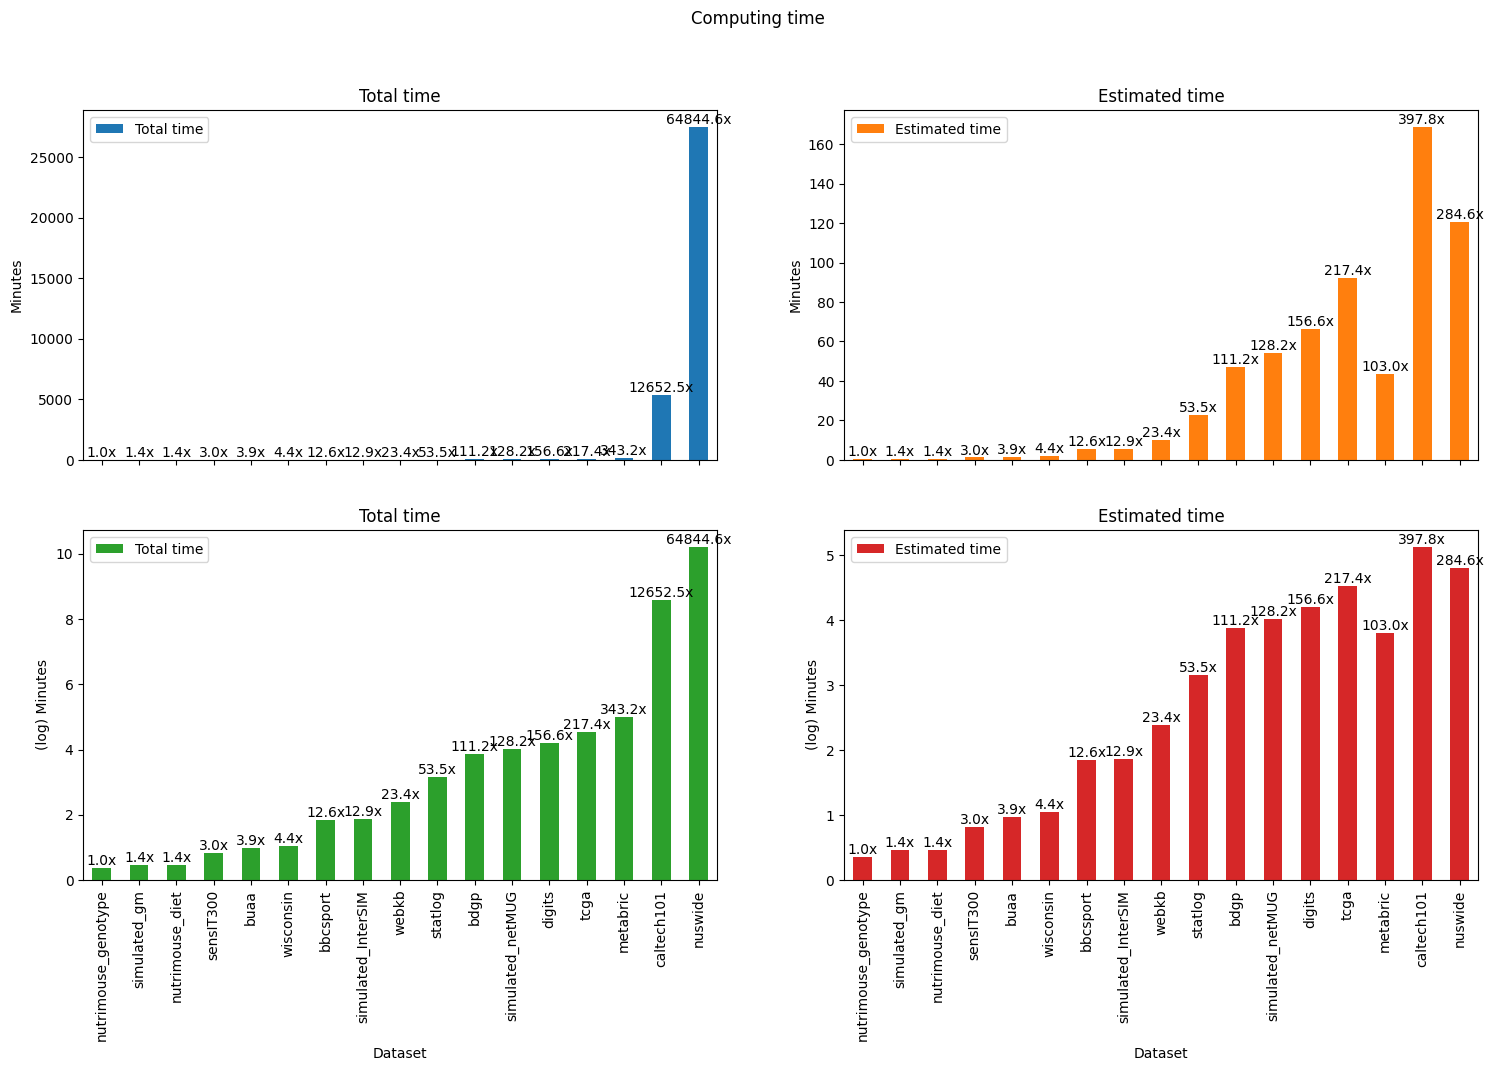

In [14]:
TIME_LIMIT = 0.4
time_limit_seconds = TIME_LIMIT * 3600

N_MISSING_PERCENTAGE = 10
N_MISSING_PATTERNS = 5
N_IMPUTING_PATTERNS = 2
N_PERMUTATIONS = 50

estimated_time = results[results < time_limit_seconds]

print("Iteration", round(results.div(3600).div(24).sum().sum(), 2), "days")
print("Limited iteration", round(estimated_time.div(3600).div(24).sum().sum(), 2), "days")
time = pd.DataFrame([(results * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum(),
                     (estimated_time * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum()],
                    index= ["Total time", "Estimated time"]).T
time = time.div(3600).div(24).sort_values("Total time")
print(time.sum(0))
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
time = pd.concat([time, time.apply(np.log1p)], axis=1)
axs = time.plot.bar(title= "Computing time", xlabel= "Dataset", ylabel= "Minutes", subplots= True, layout= (2,2), figsize= (18,10))
for idx, ax in enumerate(axs.flatten()):
    if idx > 1:
        ax.set(ylabel= f"(log) {ax.get_ylabel()}")
    _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx % 2])

In [4]:
# TIME_LIMIT = 0.5
# time_limit_seconds = TIME_LIMIT * 3600

# N_MISSING_PERCENTAGE = 10
# N_MISSING_PATTERNS = 5
# N_IMPUTING_PATTERNS = 2
# N_PERMUTATIONS = 50

# estimated_time = results[results < time_limit_seconds]

# print("Iteration", round(results.div(3600).div(24).sum().sum(), 2), "days")
# print("Limited iteration", round(estimated_time.div(3600).div(24).sum().sum(), 2), "days")
# time = pd.DataFrame([(results * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum(),
#                      (estimated_time * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum()],
#                     index= ["Total time", "Estimated time"]).T
# time = time.div(3600).div(24).sort_values("Total time")
# print(time.sum(0))
# labels = time / time.min(0)
# labels = labels.round(1).astype(str) + "x"
# axs = time.plot.bar(title= "Computing time", xlabel= "Dataset", ylabel= "Minutes", subplots= True, layout= (1,2), figsize= (18,4))
# for idx, ax in enumerate(axs[0]):
#     _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx])

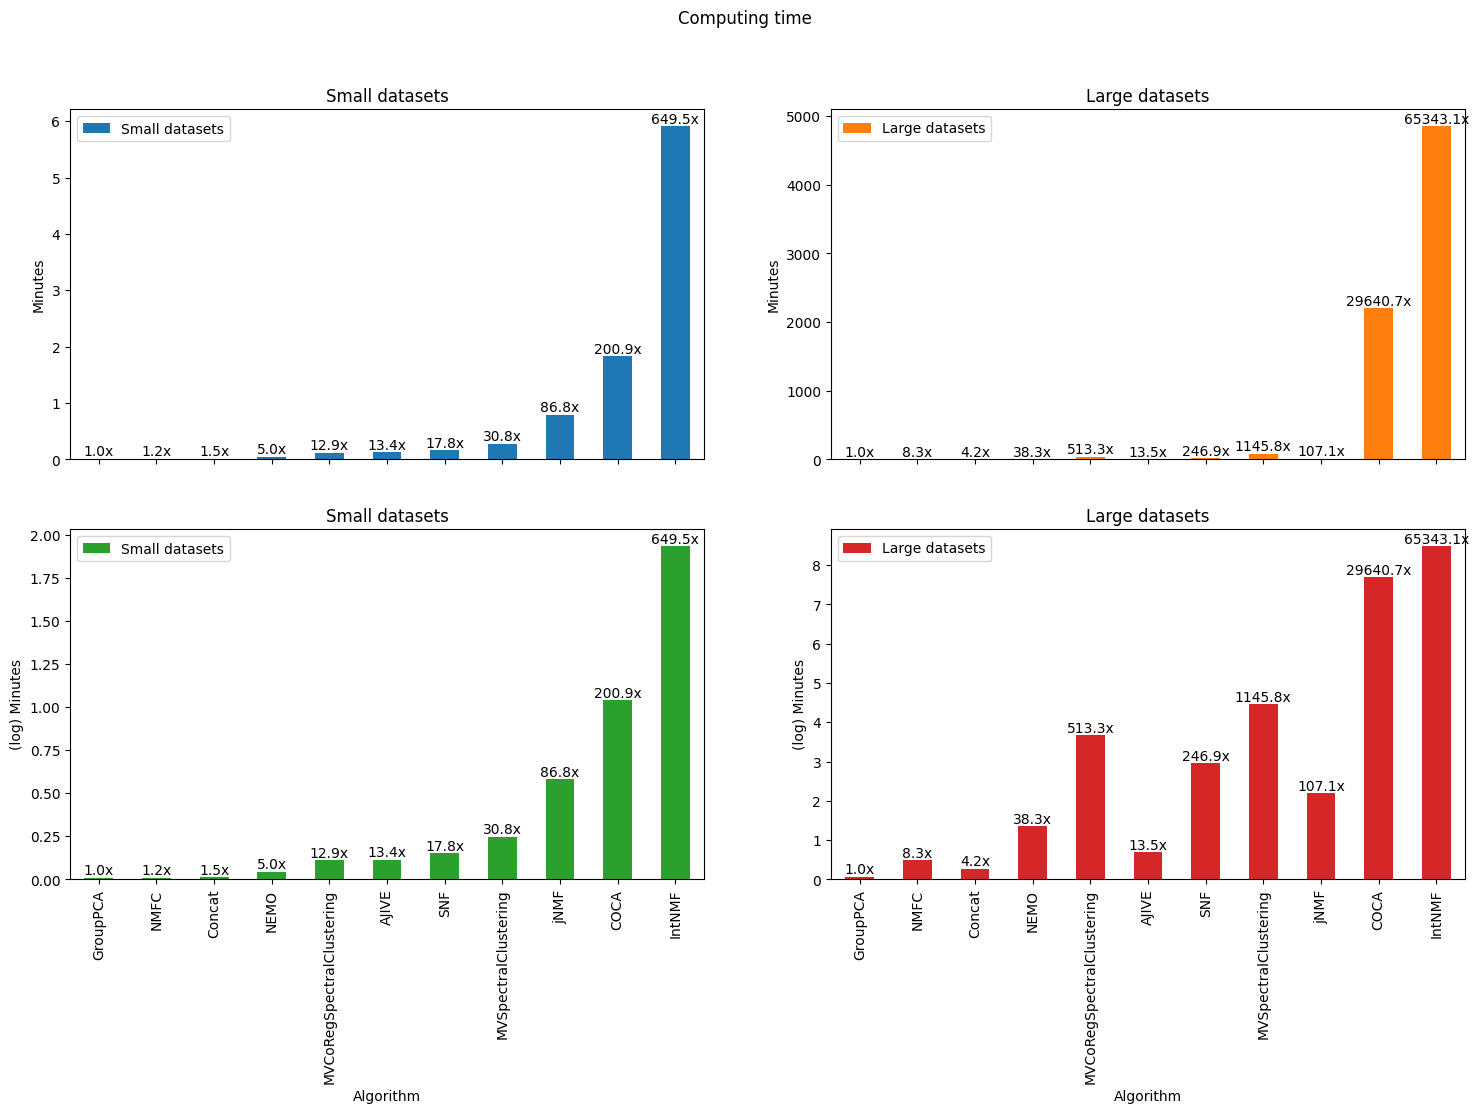

In [4]:
large_datasets = ["caltech101", "nuswide"]
time = pd.DataFrame([results.drop(columns=large_datasets).mean(1), results[large_datasets].mean(1)], index= ["Small datasets", "Large datasets"]).T
time = time.div(60).sort_values("Small datasets")
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
time = pd.concat([time, time.apply(np.log1p)], axis=1)
axs = time.plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Minutes", subplots= True, layout= (2,2), figsize= (18,10))
for idx, ax in enumerate(axs.flatten()):
    if idx > 1:
        ax.set(ylabel= f"(log) {ax.get_ylabel()}")
    _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx % 2])

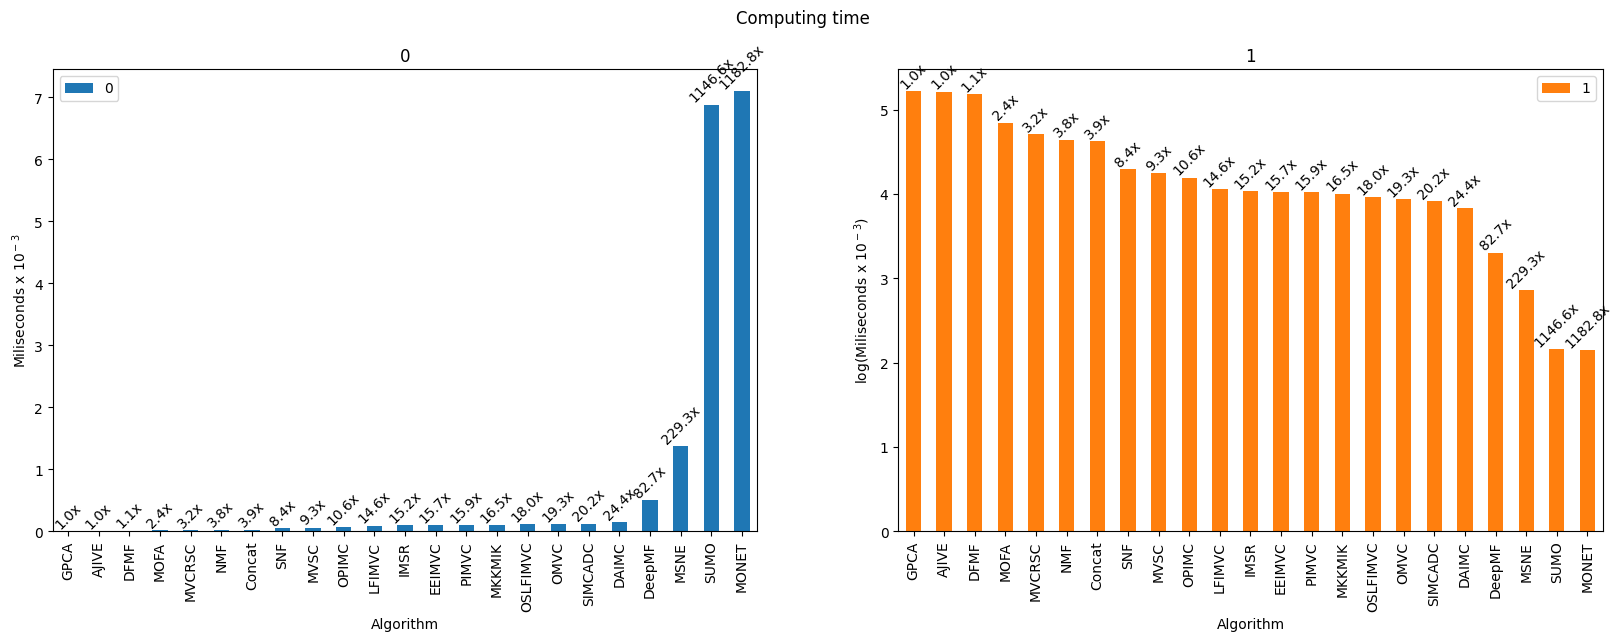

In [5]:
time = (results/dataset_table["n_cells"]).mean(1)
time = time.sort_values()
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
time = pd.concat([time.mul(1000), 0- time.apply(np.log10)], axis=1)
axs = time.plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Miliseconds x 10$^-$$^3$", subplots= True, layout= (1,2), figsize= (20,6))
for idx, ax in enumerate(axs.flatten()):
    if idx > 0:
        ax.set(ylabel= f"log({ax.get_ylabel()})")
    _ = ax.bar_label(ax.containers[0], labels= labels, rotation= 45)

In [23]:
# large_datasets = ["caltech101", "nuswide"]
# time = pd.DataFrame([results.drop(columns=large_datasets).mean(1), results[large_datasets].mean(1)], index= ["Small datasets", "Large datasets"]).T
# time = time.div(60).sort_values("Small datasets")
# labels = time / time.min(0)
# labels = labels.round(1).astype(str) + "x"
# axs = time.plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Minutes", subplots= True, layout= (1,2), figsize= (18,4))
# for idx, ax in enumerate(axs[0]):
#     _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx])

In [24]:
# time = results.div(60).mean(1).sort_values()
# ax = time.plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Minutes")
# labels = time / time.min()
# labels = labels.round(1).astype(str) + "x"
# _ = ax.bar_label(ax.containers[0], labels= labels)

In [6]:
results.div(60).style.format(precision=0).set_properties(**{'text-align': 'center'}).background_gradient(cmap='RdYlGn_r', axis= None)

,simulated_gm,nutrimouse_genotype,nutrimouse_diet,buaa,sensIT300,statlog,simulated_InterSIM,wisconsin,bbcsport,digits,simulated_netMUG,bdgp,webkb,metabric,tcga,nuswide,caltech101
Concat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0
NMF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0
MVSC,0,0,0,0,0,0,0,0,0,2,0,1,0,0,2,-0,-0
MVCRSC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0,-0
GPCA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0
AJIVE,nan,0,0,0,0,nan,0,0,0,0,0,0,0,1,1,-0,-0
SNF,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,-0,-0
DAIMC,0,0,0,0,0,0,0,0,1,0,0,0,1,3,2,-0,-0
EEIMVC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0
IMSR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0


In [18]:
TIME_RESULTS_PATH = os.path.join("test", "time_evaluation.csv")
results = pd.read_csv(TIME_RESULTS_PATH, index_col=0)
print("results", results.shape)
results.head()

results (21, 17)


,simulated_gm,simulated_InterSIM,simulated_netMUG,nutrimouse_genotype,nutrimouse_diet,bbcsport,buaa,metabric,digits,bdgp,tcga,caltech101,nuswide,sensIT300,statlog,webkb,wisconsin
Concat,0.020937,0.708584,0.958623,0.009495,0.011490,0.615496,0.305074,2.049203,1.042008,1.386216,1.822453,26.032111,10.992597,NaN,NaN,NaN,NaN
NMFC,0.007160,0.100091,0.469670,0.011918,0.010763,0.384972,0.089377,1.584606,0.505531,0.581798,3.354856,55.975224,18.057429,NaN,NaN,NaN,NaN
MVSpectralClustering,0.202724,5.404086,8.444749,0.196069,0.129316,0.464554,0.231217,20.060005,59.064082,25.078926,65.652452,5110.285582,NaN,NaN,NaN,NaN,NaN
MVCoRegSpectralClustering,0.110259,0.561998,3.278590,0.103106,0.136843,0.464830,0.145448,11.874035,13.414390,13.489572,33.783051,2289.544764,NaN,NaN,NaN,NaN,NaN
GroupPCA,0.009973,0.162918,0.335689,0.107292,0.105674,0.364418,0.106394,1.336521,1.034737,1.087339,1.359900,5.737082,3.183031,NaN,NaN,NaN,NaN


Iteration 6.64 days
Limited iteration 0.1 days
Total time        33198.950103
Estimated time      502.557883
dtype: float64


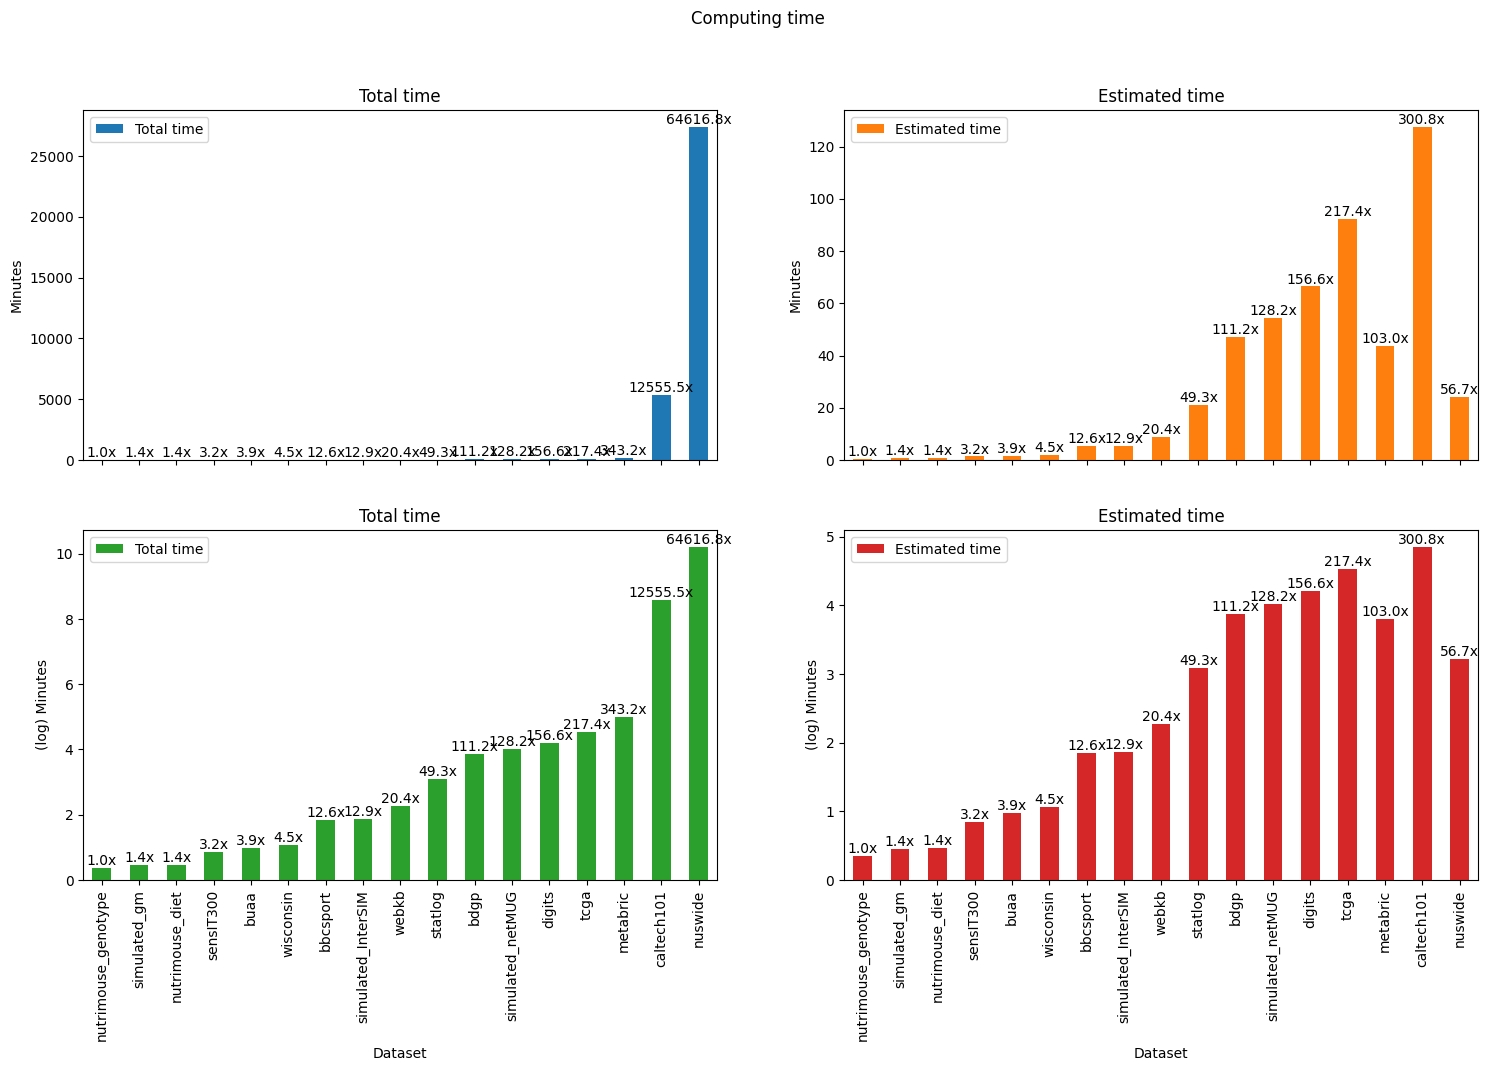

In [5]:
TIME_LIMIT = 0.4
time_limit_seconds = TIME_LIMIT * 3600

N_MISSING_PERCENTAGE = 10
N_MISSING_PATTERNS = 5
N_IMPUTING_PATTERNS = 2
N_PERMUTATIONS = 50

estimated_time = results[results < time_limit_seconds]

print("Iteration", round(results.div(3600).div(24).sum().sum(), 2), "days")
print("Limited iteration", round(estimated_time.div(3600).div(24).sum().sum(), 2), "days")
time = pd.DataFrame([(results * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum(),
                     (estimated_time * N_MISSING_PERCENTAGE * N_PERMUTATIONS * N_IMPUTING_PATTERNS * N_MISSING_PATTERNS).sum()],
                    index= ["Total time", "Estimated time"]).T
time = time.div(3600).div(24).sort_values("Total time")
print(time.sum(0))
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
time = pd.concat([time, time.apply(np.log1p)], axis=1)
axs = time.plot.bar(title= "Computing time", xlabel= "Dataset", ylabel= "Minutes", subplots= True, layout= (2,2), figsize= (18,10))
for idx, ax in enumerate(axs.flatten()):
    if idx > 1:
        ax.set(ylabel= f"(log) {ax.get_ylabel()}")
    _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx % 2])

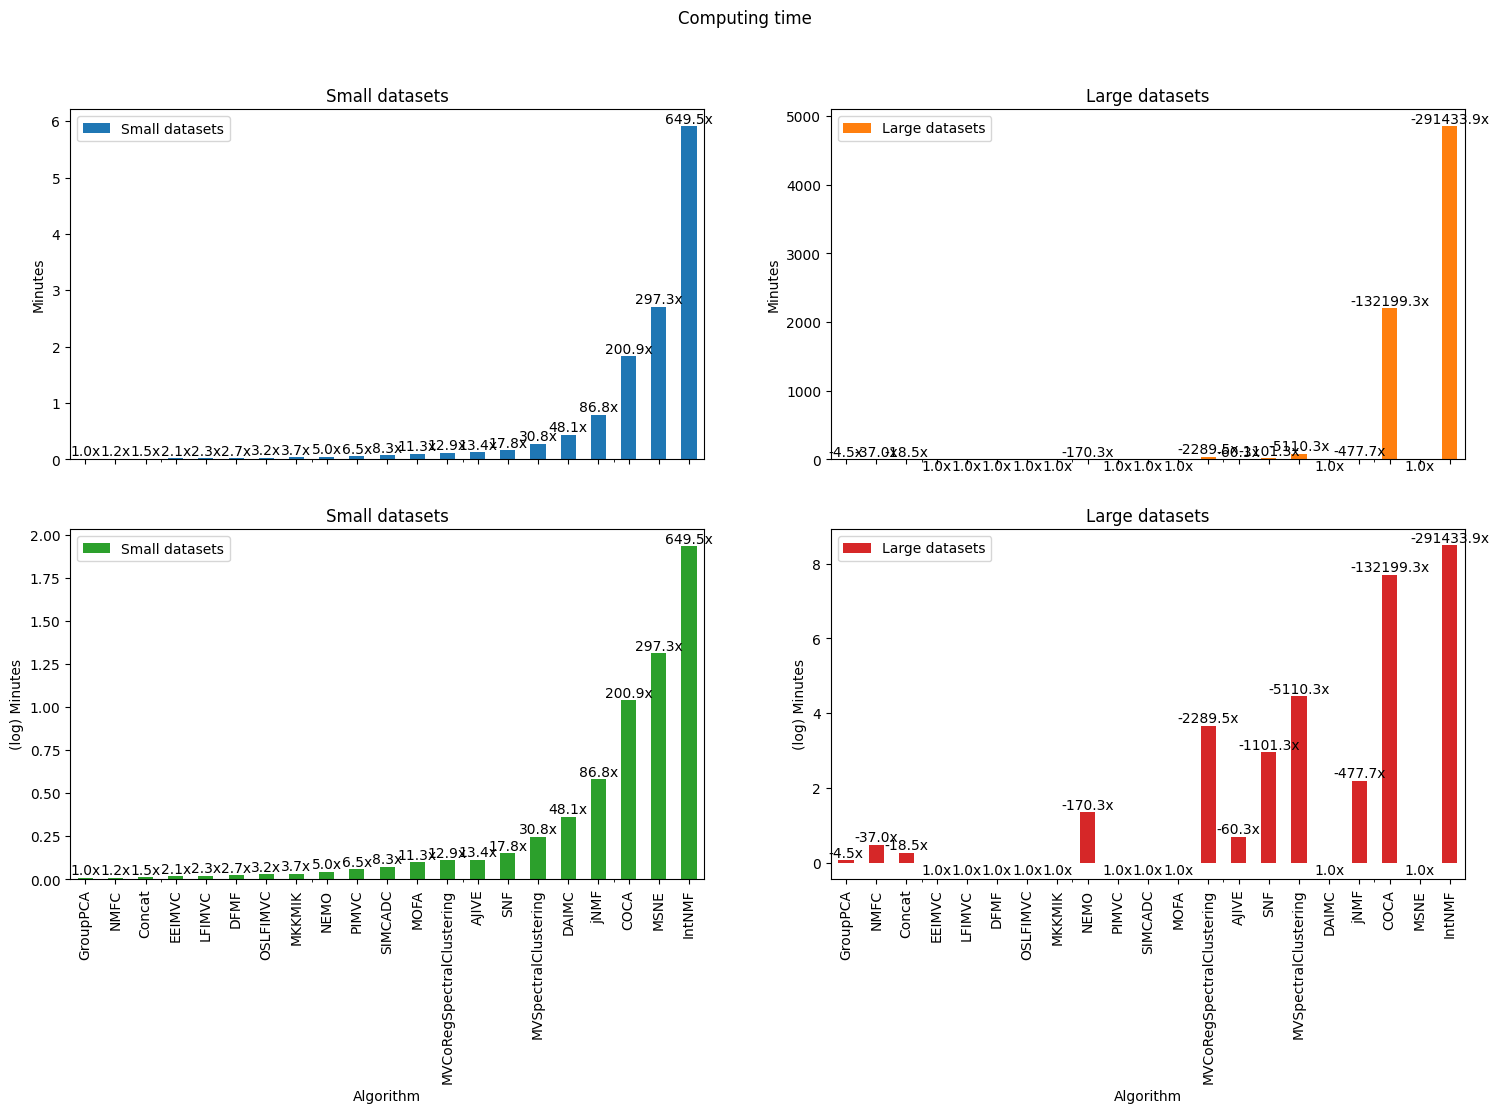

In [6]:
large_datasets = ["caltech101", "nuswide"]
time = pd.DataFrame([results.drop(columns=large_datasets).mean(1), results[large_datasets].mean(1)], index= ["Small datasets", "Large datasets"]).T
time = time.div(60).sort_values("Small datasets")
labels = time / time.min(0)
labels = labels.round(1).astype(str) + "x"
time = pd.concat([time, time.apply(np.log1p)], axis=1)
axs = time.plot.bar(title= "Computing time", xlabel= "Algorithm", ylabel= "Minutes", subplots= True, layout= (2,2), figsize= (18,10))
for idx, ax in enumerate(axs.flatten()):
    if idx > 1:
        ax.set(ylabel= f"(log) {ax.get_ylabel()}")
    _ = ax.bar_label(ax.containers[0], labels= labels.iloc[:,idx % 2])

In [6]:
results.div(60).style.format(precision=0).set_properties(**{'text-align': 'center'}).background_gradient(cmap='RdYlGn_r', axis= None)

,simulated_gm,simulated_InterSIM,simulated_netMUG,nutrimouse_genotype,nutrimouse_diet,bbcsport,buaa,metabric,digits,bdgp,tcga,caltech101,nuswide,sensIT300,statlog,wisconsin,webkb
Concat,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0,-0,-0
NMFC,0,0,0,0,0,0,0,0,0,0,0,1,0,-0,-0,-0,-0
MVSpectralClustering,0,0,0,0,0,0,0,0,1,0,1,85,nan,-0,-0,-0,-0
MVCoRegSpectralClustering,0,0,0,0,0,0,0,0,0,0,1,38,nan,-0,-0,-0,-0
GroupPCA,0,0,0,0,0,0,0,0,0,0,0,0,0,-0,-0,-0,-0
AJIVE,nan,0,0,0,0,0,0,0,0,0,0,1,1,-0,-0,-0,-0
SNF,0,0,0,0,0,0,0,0,0,0,1,18,nan,-0,-0,-0,-0
IntNMF,0,0,11,0,0,nan,0,29,nan,nan,nan,nan,4857,-0,-0,-0,-0
COCA,0,0,0,0,0,0,0,3,6,4,7,1374,3032,-0,-0,-0,-0
jNMF,0,0,1,0,0,0,0,2,0,1,3,10,5,-0,-0,-0,-0
